In [1]:
%matplotlib widget
import pandas as pd

In [2]:
# df = data_frame
df = pd.read_excel('../data/Laplacian-IteravePartialDiffEq.xlsx', header=None)

In [3]:
laplacian_arr = np.asarray(df)

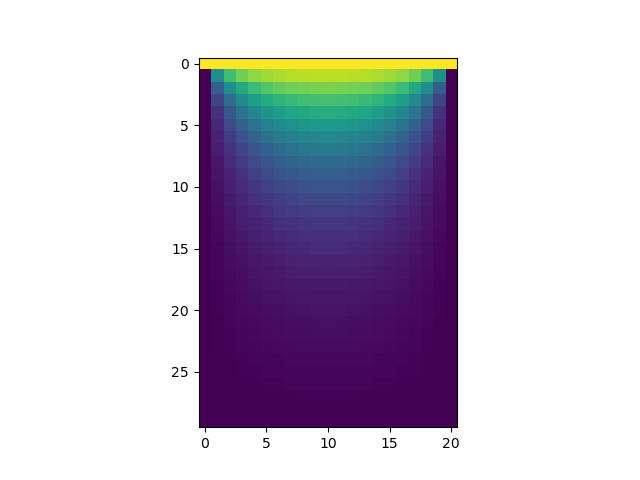

In [4]:
fig0, ax0 = plt.subplots()
ax0.imshow(laplacian_arr)

In [5]:
lp_length = laplacian_arr.shape[1]
lp_width = laplacian_arr.shape[0]

In [6]:
x, y = np.meshgrid(np.arange(lp_length), np.arange(lp_width))

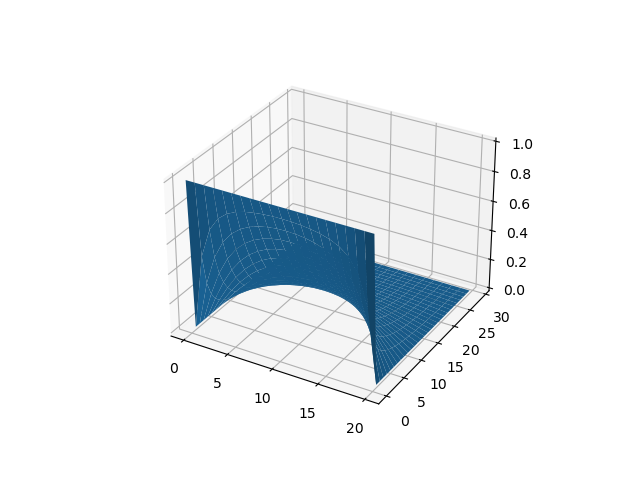

In [7]:
fig1, ax1 = plt.subplots(subplot_kw={"projection":"3d"})
ax1.plot_surface(x,y,laplacian_arr)

In [20]:
M = 100 #grid size
V = 1.0 # voltage

target = 2**-16 # target accuracy

In [21]:
phi = np.zeros([M+1, M+1], float) # voltage EVERYWHERE initialized to 0

phi[0,:] = V # [0,:] = SelectAll

phi_prime = np.empty([M+1, M+1], float)

In [28]:
%%time
phi = np.zeros([M+1, M+1], float) # voltage EVERYWHERE initialized to 0

phi[0,:] = V # [0,:] = SelectAll

phi_prime = np.empty([M+1, M+1], float)

delta = 1.0
while delta > target: # goal: index through every row and every "cell"
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: # we don't want to change boundries when i=0, i=m, j=0, j=m
                phi_prime[i, j] = phi[i, j]
            else:
                phi_prime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 # else phi_prime = average of adjacent "cells"
    delta = np.max(np.abs(phi-phi_prime)) # maximum difference
    phi, phi_prime = phi_prime, phi

CPU times: total: 38.2 s
Wall time: 1min 2s


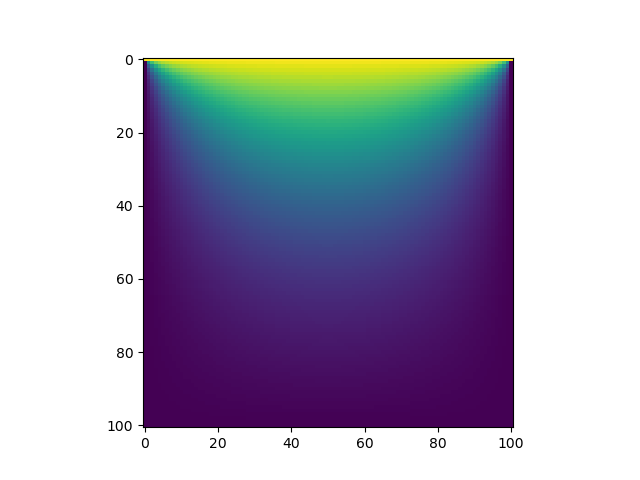

In [16]:
fig2, ax2 = plt.subplots()
ax2.imshow(phi)

In [38]:
## New method, should be faster
def find_phi(target=2**-16, M=100, V=1.0, delta=1.0, omega=0.9):
    phi = np.zeros([M+1, M+1], float)
    phi[0,:] = V # [0,:] = SelectAll
    d_phi = np.empty([M+1, M+1], float)
    phi_prime = np.empty([M+1, M+1], float)
    while delta > target: # goal: index through every row and every "cell"
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M: # we don't want to change boundries when i=0, i=m, j=0, j=m
                    phi_prime[i, j] = phi[i, j]
                    d_phi[i,j] = 0
                else:
                    d_phi[i, j] = (omega+1)*((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) - phi[i,j]
                    phi[i,j] = phi[i,j] + d_phi[i,j]
        delta = np.max(np.abs(d_phi)) # maximum difference
    return phi

In [39]:
%%time
find_phi()

CPU times: total: 5.2 s
Wall time: 7.57 s


C:\Users\john\AppData\Local\Temp\ipykernel_4044\794497819.py:14: RuntimeWarning: overflow encountered in scalar add
  d_phi[i, j] = (omega+1)*((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) - phi[i,j]
C:\Users\john\AppData\Local\Temp\ipykernel_4044\794497819.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  d_phi[i, j] = (omega+1)*((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) - phi[i,j]


array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.03747323e+259, 3.91792335e+259, ...,
        4.99378508e+283, 4.70699788e+283, 0.00000000e+000],
       [0.00000000e+000, 3.91780510e+259, 1.47953787e+260, ...,
        1.90170860e+284, 1.79252862e+284, 0.00000000e+000],
       ...,
       [0.00000000e+000, 4.63293305e+283, 1.76460481e+284, ...,
                    nan,             nan, 0.00000000e+000],
       [0.00000000e+000, 4.36631480e+283, 1.66308559e+284, ...,
                    nan,             nan, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

C:\Users\john\AppData\Local\Temp\ipykernel_4044\794497819.py:14: RuntimeWarning: overflow encountered in scalar add
  d_phi[i, j] = (omega+1)*((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) - phi[i,j]
C:\Users\john\AppData\Local\Temp\ipykernel_4044\794497819.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  d_phi[i, j] = (omega+1)*((phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4) - phi[i,j]


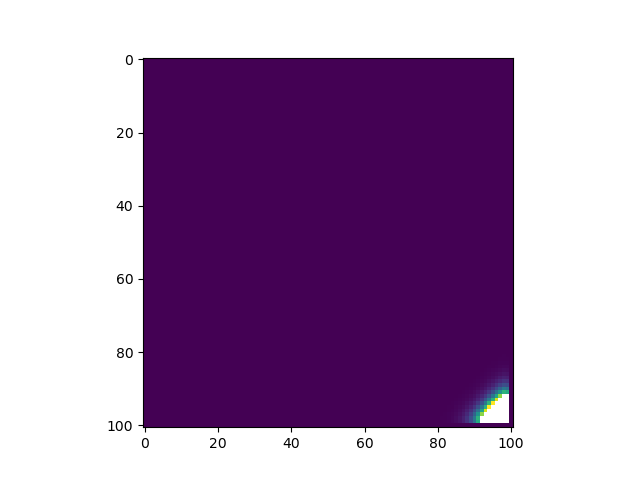

In [40]:
fig2, ax2 = plt.subplots()
find_phi()
ax2.imshow(find_phi())